In [56]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing

##### Part 1: Dataset Selection and Preprocessing (15 points)
###### 1. Choose one of the following datasets:
###### 1. Yale Face Database
###### 2. Olivetti Face Database
###### 2. Download and prepare the dataset for your experiments. Ensure that the dataset contains
###### a variety of individuals
###### 3. Implement image preprocessing techniques to ensure that all images are in a consistent nformat. ( converting to grayscale, resizing the image to a fixeddimession)

In [66]:
# Loading the pgm images into numpy arrays

# Load images from a folder and preprocess them
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                img_gray = img.convert('L')
                img_resized = img_gray.resize((64, 64))
                img_arr = np.array(img_resized)
                images.append(img_arr)
    return np.array(images)


# def flatten_images(images):
#     num_images, img_height, img_width = images.shape[:3]
#     flattened_images = images.reshape((num_images, img_height * img_width))
#     flatten_images = flattened_images/255.0
#     return flatten_images

# # file path
# file_path = './yalefaces'

# loaded_images = load_images_from_folder(file_path)
# image_dataset = flatten_images(loaded_images)

# print(image_dataset.shape)
        

In [67]:
# Flatten and normalize the images
def flatten_images(images):
    num_images, img_height, img_width = images.shape[:3]
    flattened_images = images.reshape((num_images, img_height * img_width))
    flatten_images = flattened_images / 255.0
    return flatten_images

In [68]:
# Split the dataset into training and testing sets
def split_train_test_data(images, test_ratio=0.2):
    num_samples = images.shape[0]
    num_test_samples = int(num_samples * test_ratio)
    
    # Randomly shuffle the indices
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Split the indices into training and testing
    train_indices = indices[num_test_samples:]
    test_indices = indices[:num_test_samples]
    
    # Extract the training and testing data
    train_data = images[train_indices]
    test_data = images[test_indices]
    
    return train_data, test_data

In [69]:
# Perform PCA on the training data
def pca(img_dataset, num_components):
    # Compute the mean from the data
    mean = np.mean(img_dataset, axis=0)
    
    # Center the data
    centered_data = img_dataset - mean
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data.T)
    
    # Calculate eigenvectors & eigenvalues of the covariance matrix
    eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    
    # Sort the eigenvalues in descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_index]
    eigen_vectors = eigen_vectors[:, sorted_index]
    
    # Compute the projection matrix
    projection_matrix = eigen_vectors[:, :num_components]
    
    return projection_matrix, eigen_values, eigen_vectors, mean


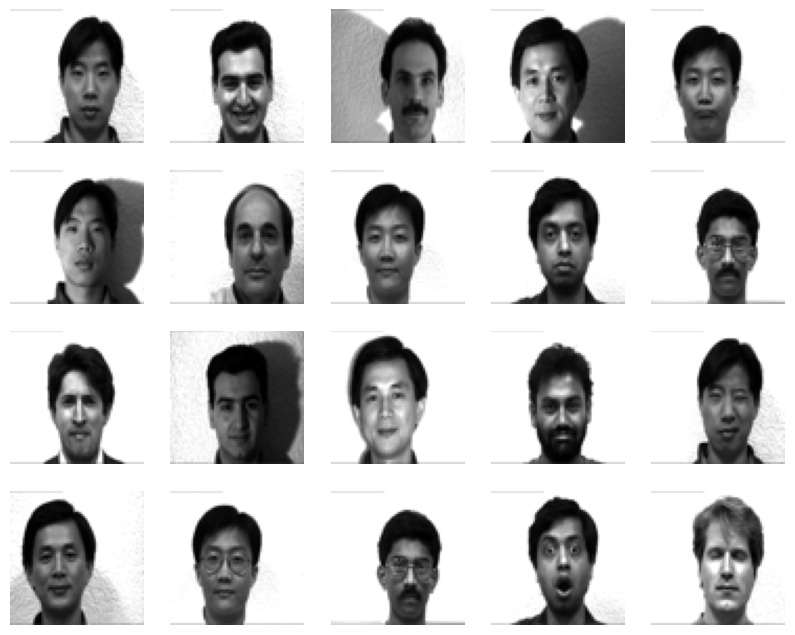

In [58]:
# num_rows = 4
# num_cols = 5

# # Create a figure and axis objects
# fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# # Loop over the images and plot them on the axis objects
# for i in range(num_rows):
#     for j in range(num_cols):
#         # Compute the index of the image in the flattened dataset
#         idx = i * num_cols + j
#         # Reshape the flattened image to its original shape
#         img = image_dataset[idx].reshape((64, 64))
#         # Plot the image on the axis object
#         axs[i, j].imshow(img, cmap='gray')
#         axs[i, j].axis('off')

# # Show the plot
# plt.show()

/tmp/ipykernel_56343/4289210462.py:33: ComplexWarning: Casting complex values to real discards the imaginary part
  eigen_face = eigen_vectors[:, i].reshape((64, 64)).astype(np.float64)


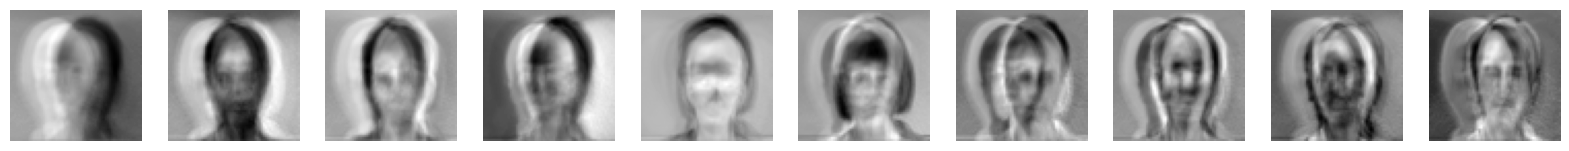

In [59]:

# # principal component analysis implementation
# def pca(img_dataset):
#     # Compute the mean from the dsata
#     mean = np.mean(img_dataset, axis=0)
#     # Center the data
#     centered_data = img_dataset - mean
#     # Calculate the covariance matrix
#     covariance_matrix = np.cov(centered_data.T)
#     # Calculate eigenvectors & eigenvalues of the covariance matrix
#     eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
#     # Sort the eigenvalues in descending order
#     sorted_index = np.argsort(eigen_values)[::-1]
#     eigen_values = eigen_values[sorted_index]
#     eigen_vectors = eigen_vectors[:, sorted_index]
#     # compute the projection matrix
#     projection_matrix = eigen_vectors.T.dot(centered_data.T)
    
#     return projection_matrix, eigen_values, eigen_vectors, mean

# # call pca function

# projection_matrix, eigen_values, eigen_vectors, mean = pca(image_dataset)


# # choose the number of eigen faces to retain
# num_eigen_faces = 10

# # visualize the eigen faces
# # Create a figure and axis objects
# fig, axs = plt.subplots(1, num_eigen_faces, figsize=(20, 4))
# for i in range(num_eigen_faces):
#     # Reshape the eigen vector to its original shape
#     eigen_face = eigen_vectors[:, i].reshape((64, 64)).astype(np.float64)
#     # Plot the eigen face on the axis object
#     axs[i].imshow(eigen_face, cmap='gray')
#     axs[i].axis('off')
    
# # Show the plot
# plt.show()

# # Reshape the first eigen vector to its original shape
# eigen_face = eigen_vectors[:, 0].reshape((64, 64)).astype(np.float64)

# # Plot the first eigen face
# plt.imshow(eigen_face, cmap='gray')
# plt.axis('off')
# plt.show()

In [70]:
# load and preprocess the dataset
file_path = './yalefaces'
loaded_images = load_images_from_folder(file_path)
image_dataset = flatten_images(loaded_images)

# Split the dataset into training and testing sets
train_data, test_data = split_train_test_data(image_dataset, test_ratio=0.2)


In [73]:
# Perform PCA on the training data to generate eigenfaces
num_eigen_faces = 10  # You can change this number based on your experiments
projection_matrix, eigen_values, eigen_vectors, mean = pca(train_data, num_eigen_faces)




/tmp/ipykernel_56343/1560107459.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  eigen_face = eigen_vectors[:, i].reshape((64, 64)).astype(np.float64)


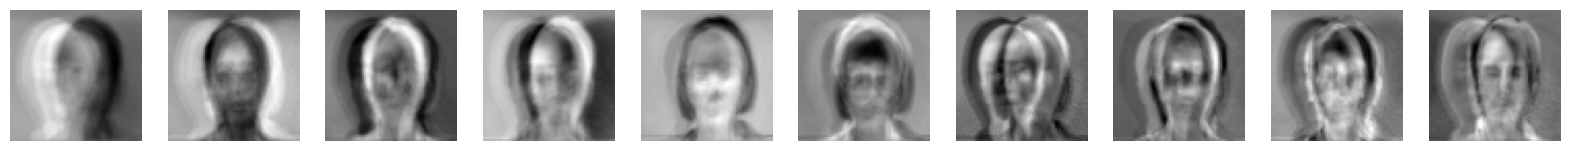

In [75]:
# Visualize the eigenfaces
# Create a figure and axis objects
fig, axs = plt.subplots(1, num_eigen_faces, figsize=(20, 4))
for i in range(num_eigen_faces):
    # Reshape the eigen vector to its original shape
    eigen_face = eigen_vectors[:, i].reshape((64, 64)).astype(np.float64)
    # Plot the eigen face on the axis object
    axs[i].imshow(eigen_face, cmap='gray')
    axs[i].axis('off')

# Show the plot
plt.show()

/tmp/ipykernel_56343/2443187821.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  selected_eigen_face = eigen_vectors[:, eigen_face_index].reshape((64, 64)).astype(np.float64)


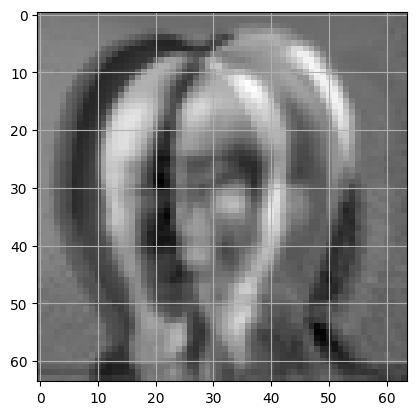

In [77]:
# 
eigen_face_index = 4 #

# Reshape the selected eigen vector to its original shape
selected_eigen_face = eigen_vectors[:, eigen_face_index].reshape((64, 64)).astype(np.float64)

# Plot the selected eigen face
plt.imshow(selected_eigen_face, cmap='gray')
plt.axis('on')
plt.grid(True)
plt.show()






